# 데이터마이닝 3주차

## Regression Tree
+ 장점
    - 결과를 이해하거나 설명하기 무척 쉬움*
    - Non-parametric methods
    - Outlier에 민감하지 않음  

In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# set params(figure size, font size)
plt.rc('figure', figsize=(10, 8))
plt.rc('font', size=13)

## 1. Example : 1D Regression
+ $X_1$ : 200 random number [0,5]
+ $y = sin(X_1) + sin(6X_1) + \epsilon$

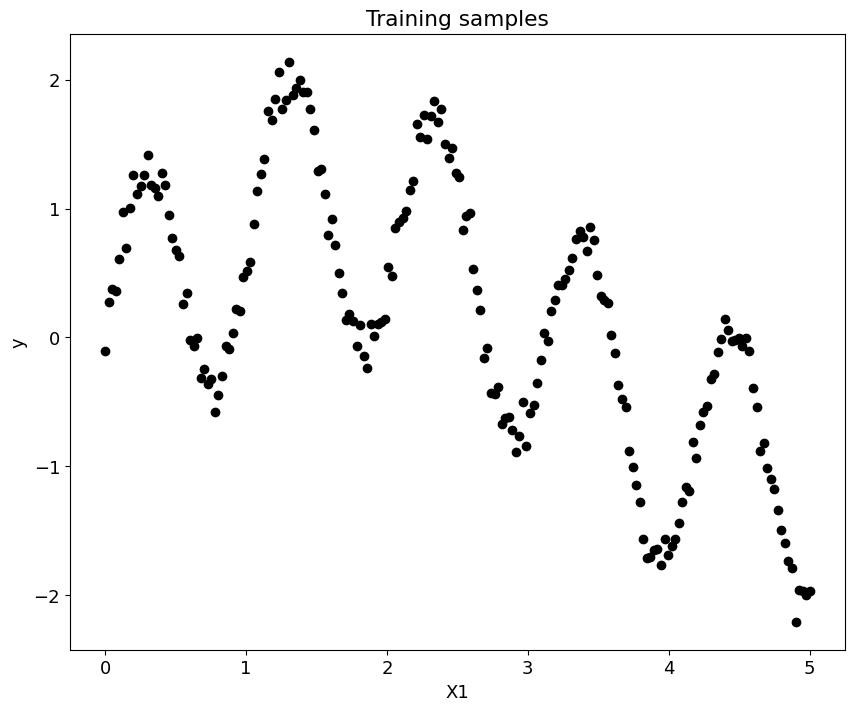

In [ ]:
# create a non-linear regression sample
rng = np.random.RandomState(123)
X = np.linspace(0, 5, 200)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# scatter plot
plt.scatter(X, y, c="k")
plt.xlabel("X1")
plt.ylabel("y")
plt.title("Training samples")
plt.show()

### 1.1 Regression tree
+ CART (Classification And Regression Trees)
+ Splitting criterion
    - 잔차를 줄이려는 방향으로 분기
    - sum of squared resiudals $SSR(node) = \sum^{n}_{i=1}(y_i-\hat y_i)^2$ (regression tree의 경우 $\hat y_i = \bar y$),
    - $SSR(parent) - SSR(child)$가 커지도록
    - MSE, MAE, poisson, F-statistic 등

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree # tree visualization
import sklearn
sklearn.__version__

'1.2.2'

In [ ]:
# fit regression model
reg_tree = DecisionTreeRegressor(max_depth=2, random_state=123) # criterion default : mse
reg_tree.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=123)

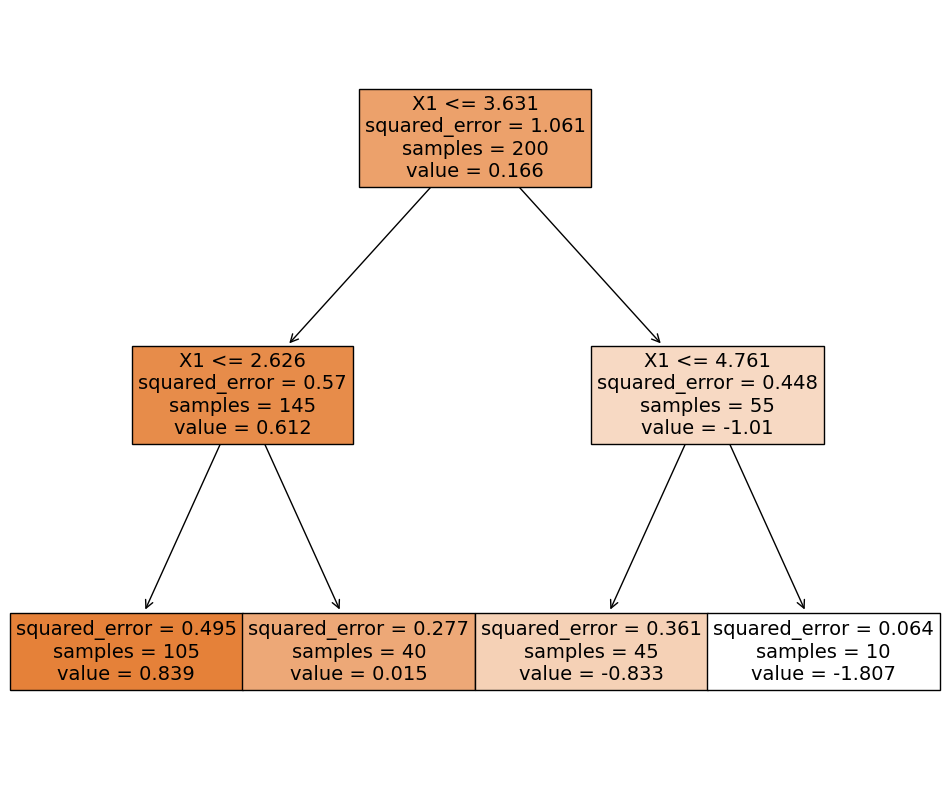

In [ ]:
# plot tree
plt.figure(figsize=(12,10))
tree.plot_tree(reg_tree, feature_names=['X1'], filled=True)
plt.show()

+ Remark
    - $X_1 <= 3.631$ : 분기조건
        - 왼쪽 child 노드는 해당 조건을 만족하는(true인) subset, 오른쪽 child 노드는 false인 subset
    - samples : 해당 노드에 속한 샘플들의 개수
    - value : 예측 값. 해당 노드에 속한 샘플들의 y값의 평균
    - squared_error : 실제 y와 'value' 간의 mean squared error
    - node 색깔은 value의 크기에 따라 달라짐
    
#### MSE, Predicted value
+ $MSE = \frac1n\sum^{n}_{i=1}(y_i-\hat y_i)^2$, (regression tree의 경우 $\hat y_i = \bar y$)

In [ ]:
# MSE, value of the leftmost leaf node
subset_y = y[(X.ravel() <= 3.631) & (X.ravel() <= 2.626)]
value = subset_y.mean()
mse = 1/len(subset_y) * sum((subset_y - value)**2)

print(mse, value)

0.4949369054978452 0.8394006275939543


#### Predictive performance
- predicted_y : leaf 노드에 속한 샘플들의 y값의 평균

In [ ]:
# predict
pred_y = reg_tree.predict(X)
pred_y[90:160]

array([ 0.83940063,  0.83940063,  0.83940063,  0.83940063,  0.83940063,
        0.83940063,  0.83940063,  0.83940063,  0.83940063,  0.83940063,
        0.83940063,  0.83940063,  0.83940063,  0.83940063,  0.83940063,
        0.01530484,  0.01530484,  0.01530484,  0.01530484,  0.01530484,
        0.01530484,  0.01530484,  0.01530484,  0.01530484,  0.01530484,
        0.01530484,  0.01530484,  0.01530484,  0.01530484,  0.01530484,
        0.01530484,  0.01530484,  0.01530484,  0.01530484,  0.01530484,
        0.01530484,  0.01530484,  0.01530484,  0.01530484,  0.01530484,
        0.01530484,  0.01530484,  0.01530484,  0.01530484,  0.01530484,
        0.01530484,  0.01530484,  0.01530484,  0.01530484,  0.01530484,
        0.01530484,  0.01530484,  0.01530484,  0.01530484,  0.01530484,
       -0.8326688 , -0.8326688 , -0.8326688 , -0.8326688 , -0.8326688 ,
       -0.8326688 , -0.8326688 , -0.8326688 , -0.8326688 , -0.8326688 ,
       -0.8326688 , -0.8326688 , -0.8326688 , -0.8326688 , -0.83

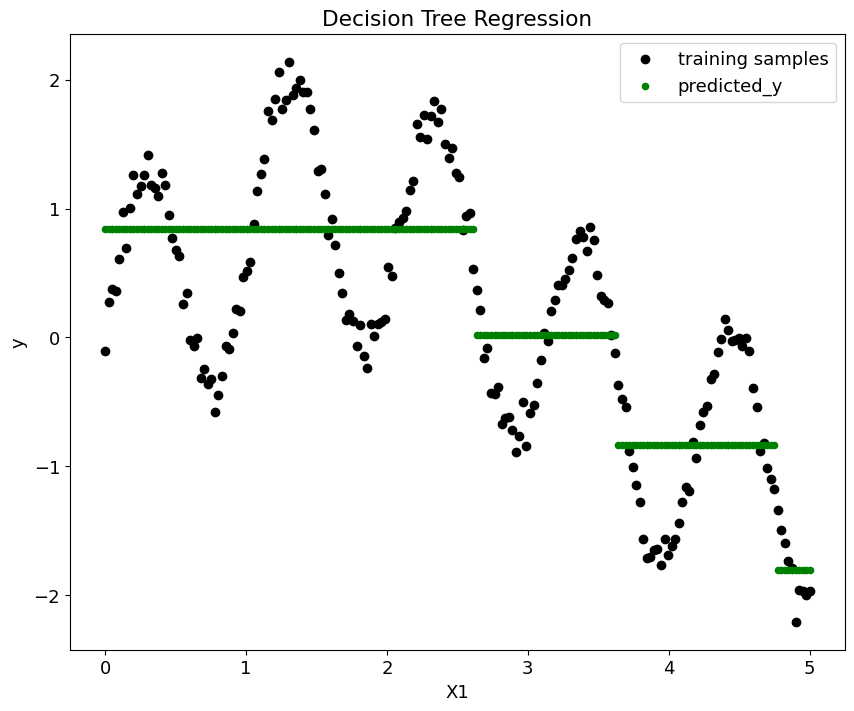

In [ ]:
# plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.scatter(X, pred_y, c="g", s=20, label="predicted_y")
plt.xlabel("X1")
plt.ylabel("y")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
# predicitve performance
reg_tree.score(X,y) # R^2

0.6234556101867424

In [ ]:
# overfitting
reg_tree = DecisionTreeRegressor(max_depth=100, random_state=123)
reg_tree.fit(X, y)

DecisionTreeRegressor(max_depth=100, random_state=123)

### 1.2 Model tree

- predicted_y : leaf 노드에 속한 샘플들의 y값을 선형회귀로 예측

In [ ]:
!pip install --upgrade linear-tree # 설치
from lineartree import LinearTreeRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
# fit regression model
model_tree = LinearTreeRegressor(
    base_estimator = LinearRegression(),
    max_depth = 2)
model_tree.fit(X, y)

LinearTreeRegressor(base_estimator=LinearRegression(), max_depth=2)

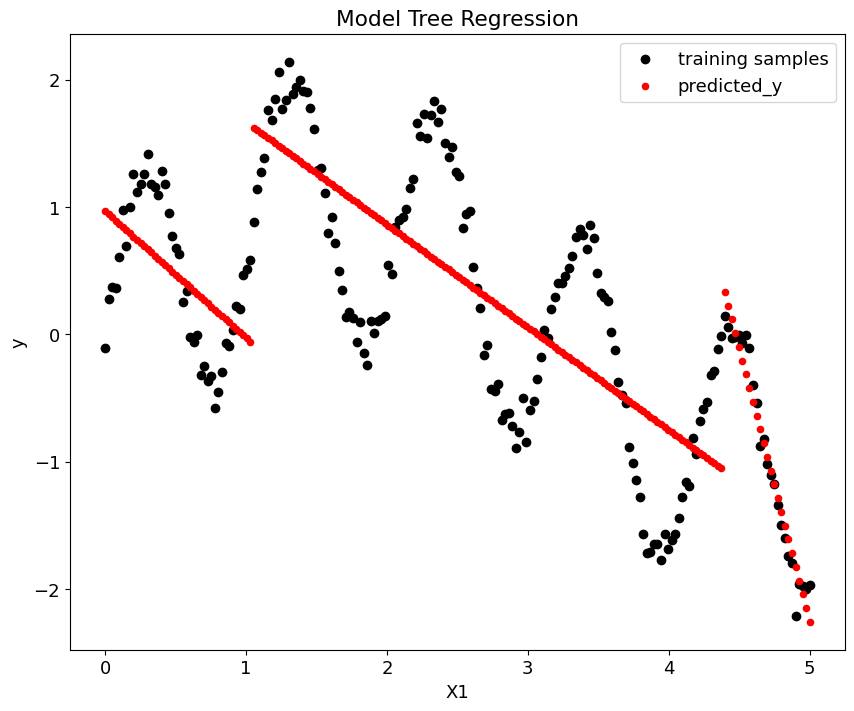

In [ ]:
# predict
pred_y = model_tree.predict(X)
# plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.scatter(X, pred_y, c="r", s=20, label="predicted_y",)
plt.xlabel("X1")
plt.ylabel("y")
plt.title("Model Tree Regression")
plt.legend()
plt.show()

In [ ]:
# predicitve performance
model_tree.score(X,y) # R^2

0.6435933886019964

## 2. Decision Tree Regression with multiple variables
### 2.1 Dataset
+ Boston house prices dataset

In [ ]:
import warnings
warnings.filterwarnings('ignore') # 경고 메세지 무시
from sklearn import datasets

In [ ]:
boston_data = datasets.fetch_openml('boston')
#boston_data # `data`,`target`,`feature_names`,`DESCR`(description),`filename`
print(boston_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [ ]:
# create dataframe
df_boston = pd.DataFrame(data=boston_data.data,
                         columns= boston_data.feature_names)
df_boston['MEDV'] = boston_data.target # y
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# information about dataframe
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [ ]:
# check number of unique values in each column
df_boston.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [ ]:
# check for null value
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### 2. Data Exploration
+ visualization
    - histogram
    - correlation matrix
    - pairplot(histogram & scatter plot)
    - box plot

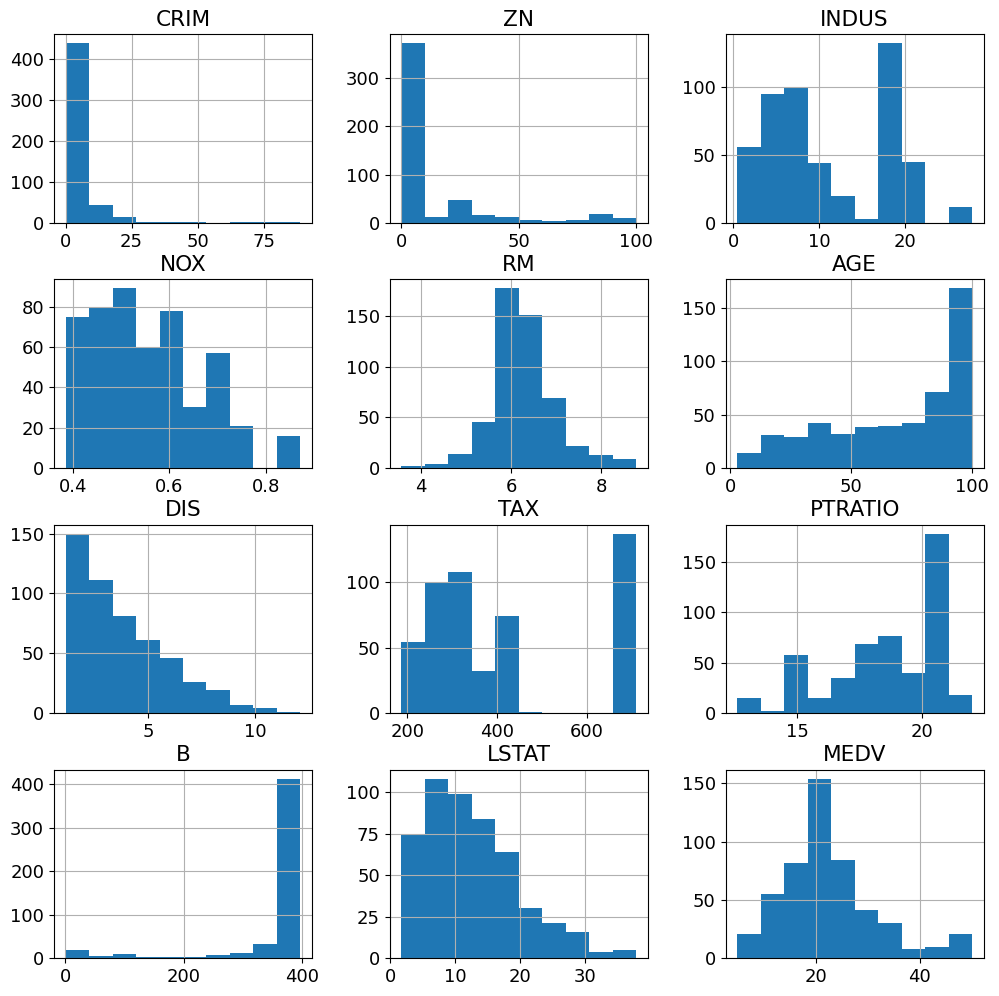

In [ ]:
# histogram
df_boston.hist(linewidth=1.2, figsize=(12,12))
plt.show()

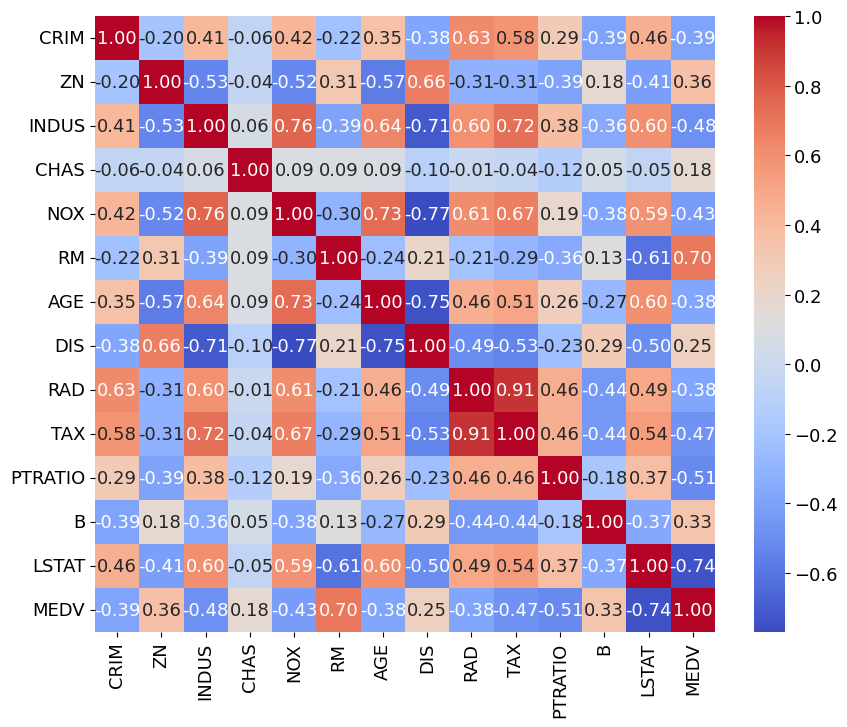

In [ ]:
# correlation
sns.heatmap(df_boston.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

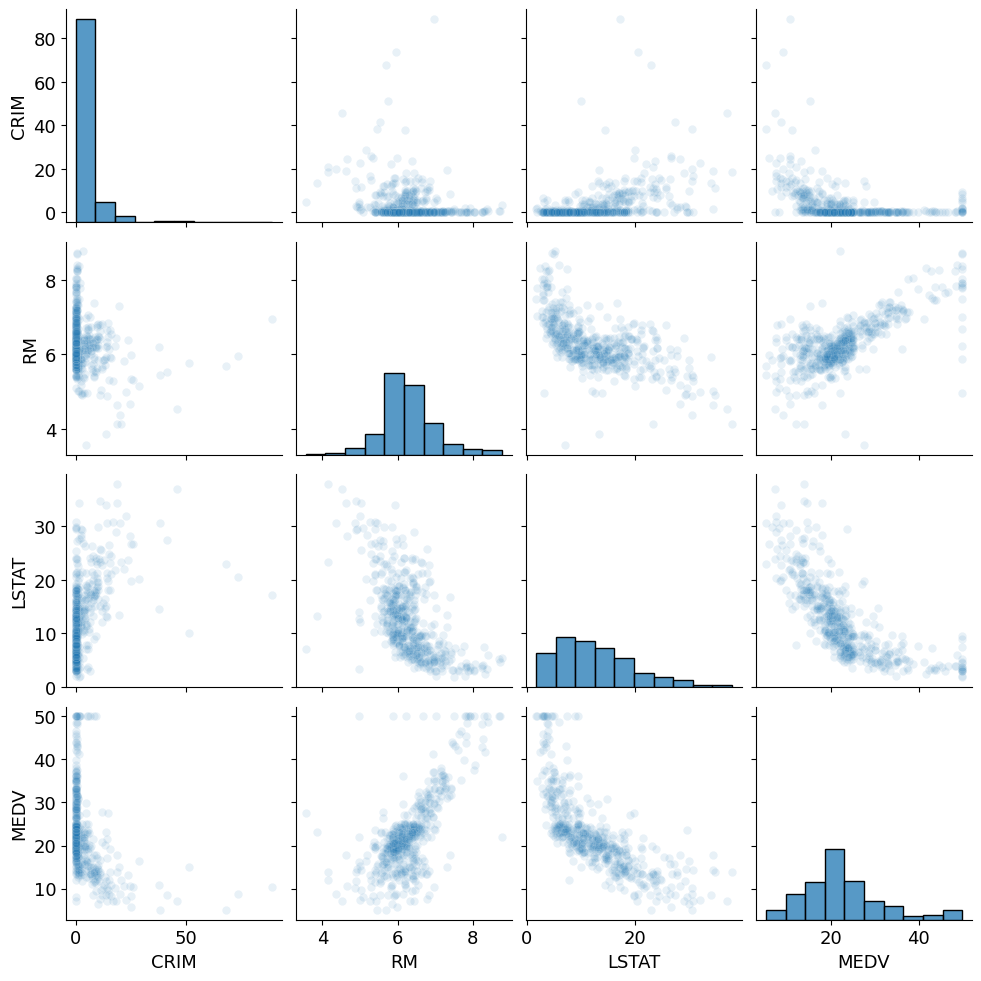

In [ ]:
# pairplot
import seaborn as sns
sns.pairplot(df_boston[['CRIM','RM','LSTAT','MEDV']],
             plot_kws={'alpha':0.1}, diag_kws={'bins':10})
plt.show()

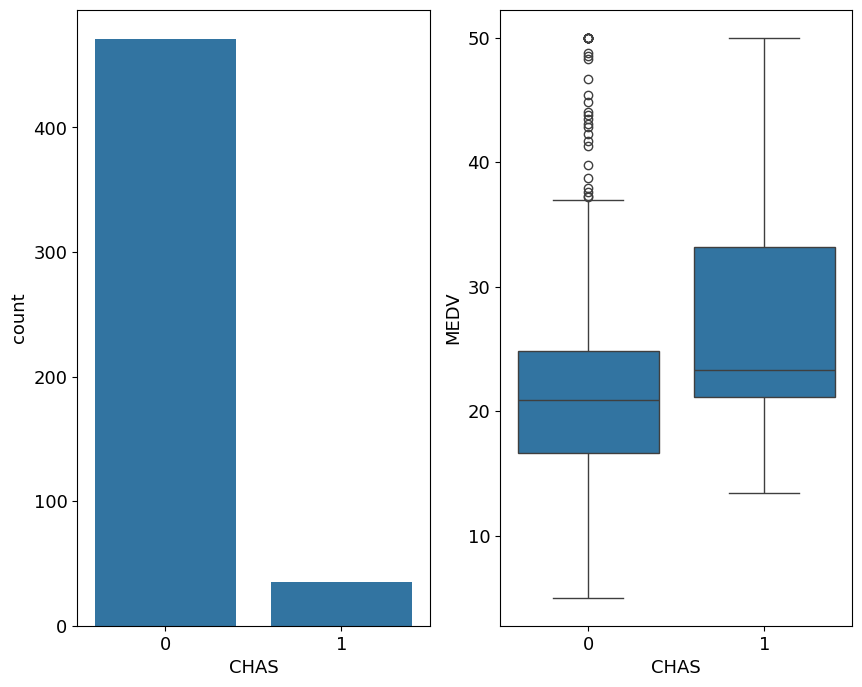

In [ ]:
# countplot, boxplot
fig, ax = plt.subplots(1, 2)
sns.countplot(data=df_boston, x='CHAS', ax=ax[0])
sns.boxplot(data=df_boston, x='CHAS', y='MEDV', ax=ax[1])
plt.show()

### 2.3 Model
+ CART (Classification And Regression Trees)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [ ]:
# splitting training/test dataset
X = df_boston.drop(columns=['MEDV'])
y = df_boston['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
# fit regression model
#reg_tree = DecisionTreeRegressor(criterion="mse", max_depth=2, random_state=123) # criterion default : mse
reg_tree = DecisionTreeRegressor(criterion="squared_error", max_depth=2, random_state=123)
reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2, random_state=123)

### 2.4 Tree visualization

In [ ]:
# export rules of the decision tree
features = X.columns.tolist()
print(tree.export_text(reg_tree, feature_names=features))

|--- RM <= 6.98
|   |--- LSTAT <= 14.40
|   |   |--- value: [23.33]
|   |--- LSTAT >  14.40
|   |   |--- value: [14.80]
|--- RM >  6.98
|   |--- RM <= 7.44
|   |   |--- value: [32.91]
|   |--- RM >  7.44
|   |   |--- value: [46.20]



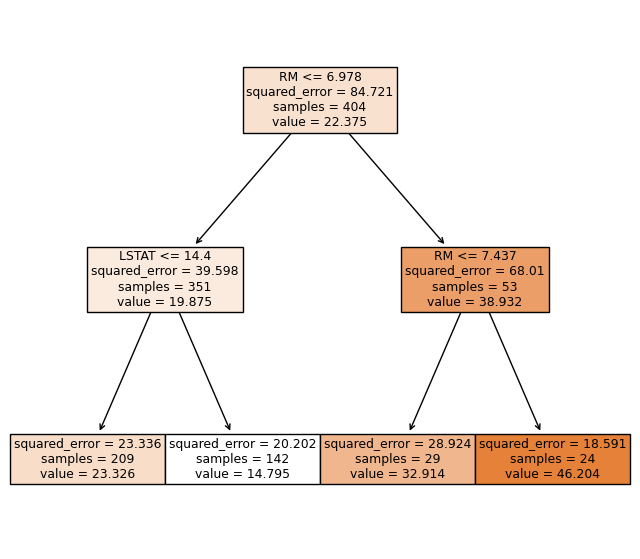

In [ ]:
# plot tree
plt.figure(figsize=(8,7))
tree.plot_tree(reg_tree, feature_names=features, filled=True)
plt.show()
# plt.savefig(reg_tree, dpi=300) # 저장 시 크기 조절이 잘 안됨

In [ ]:
# import python packages for tree visualization
from six import StringIO
import pydotplus
from IPython.display import Image # 불러온 image를 다룰 때 쓰임
# !pip install graphviz

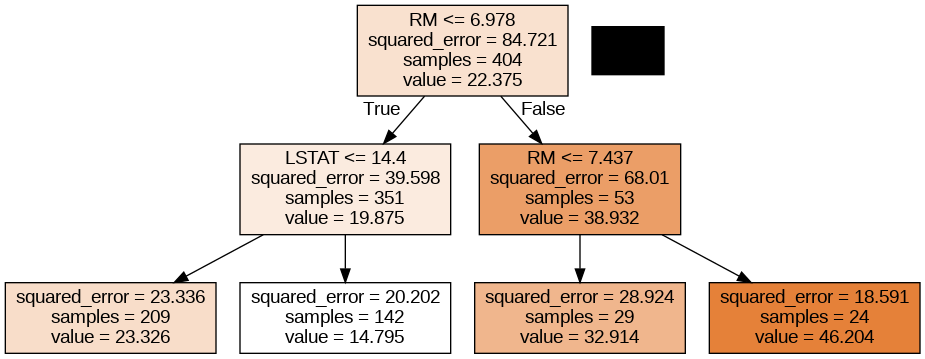

In [ ]:
# visualization and save figure
# 크기 조정없이 이미지 저장 가능
dot_file = StringIO() # 문자열 데이터를 저장하는 역할

# export_graphviz : tree 시각화용
# model, feature_names, out_file - 출력할 파일
tree.export_graphviz(reg_tree, feature_names=features, out_file=dot_file, filled =True)

# Data를 graph로 표시하기 위해 Dot class로 변환
graph = pydotplus.graph_from_dot_data(dot_file.getvalue())
graph.write_png("reg_tree1.png") # 이미지 저장

Image(graph.create_png()) # 저장하지 않아도 ipython에서 출력할 수 있음

### 2.4 Predictive Performance

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [ ]:
# RMSE, MSE, R-squared
RMSE = [mean_squared_error(y, reg_tree.predict(X), squared=False),
       mean_squared_error(y_test, reg_tree.predict(X_test), squared=False)]
MAPE = [mean_absolute_percentage_error(y, reg_tree.predict(X)),
        mean_absolute_percentage_error(y_test, reg_tree.predict(X_test))]
r2 = [r2_score(y, reg_tree.predict(X)),
      r2_score(y_test, reg_tree.predict(X_test))]

performance_summary = pd.DataFrame({
'Dataset': ['Training', 'Test'],
'RMSE': RMSE,
'MAPE': MAPE,
'R^2': r2
})
performance_summary.round(4)

,Dataset,RMSE,MAPE,R^2
0,Training,5.1076,0.1913,0.6910
1,Test,6.3935,0.1938,0.5059


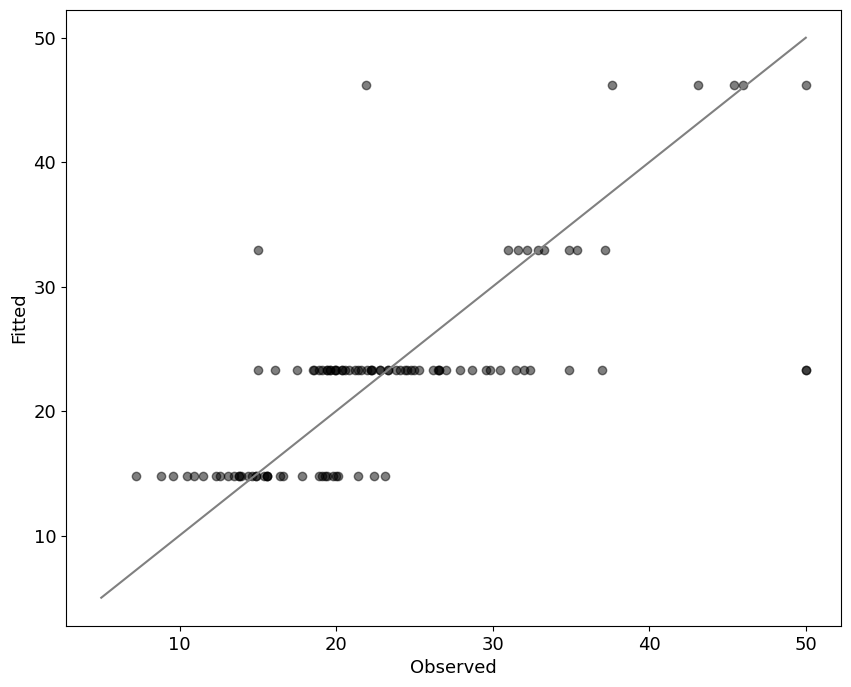

In [ ]:
# plot
plt.scatter(y_test, reg_tree.predict(X_test), color='k', alpha=0.5)
line = np.linspace(min(y.values), max(y.values), 1000)
plt.plot(line, line, color = 'grey')
plt.xlabel('Observed')
plt.ylabel('Fitted')
plt.show()

In [ ]:
reg_tree = DecisionTreeRegressor(max_depth=100, random_state=123)
reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=100, random_state=123)

### 2.5 Overfitting
+ decision tree가 아무 제약 없이 full growing을 하면 해당 training datset에 overfitting됨
+ 해결방법
    - stopping condition으로 full tree가 되는 것을 사전에 막음  
    - 또는, full tree 생성 후 가지치기(pruning)
+ stopping conditions
    - max_depth : tree의 최대 depth. tree depth가 크면 해석하기도 힘듬
    - min_samples_split : 분기 시 노드의 최소 sample 수
    - min_samples_leaf : leaf node의 최소 sample 수
    - overfitting을 방지하면서도 적절히 분기하게끔 설정

In [ ]:
reg_tree = DecisionTreeRegressor(min_samples_leaf=0.03, random_state=123)
reg_tree.fit(X_train,y_train)

RMSE = [mean_squared_error(y, reg_tree.predict(X), squared=False),
       mean_squared_error(y_test, reg_tree.predict(X_test), squared=False)]
MAPE = [mean_absolute_percentage_error(y, reg_tree.predict(X)),
        mean_absolute_percentage_error(y_test, reg_tree.predict(X_test))]
r2 = [r2_score(y, reg_tree.predict(X)),
      r2_score(y_test, reg_tree.predict(X_test))]

performance_summary = pd.DataFrame({
'Dataset': ['Training', 'Test'],
'RMSE': RMSE,
'MAPE': MAPE,
'R^2': r2
})
performance_summary.round(4)

,Dataset,RMSE,MAPE,R^2
0,Training,3.7785,0.1149,0.8309
1,Test,5.4674,0.1405,0.6387
